In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
 
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
 
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('Online Retail.csv')

In [5]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [6]:
df.shape


(541909, 8)

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [8]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


In [9]:
for col in df.columns:
    temp = df[col].isnull().sum()
    if temp > 0:
        print(f'Column {col} contains {temp} null values.')

Column Description contains 1454 null values.
Column CustomerID contains 135080 null values.


In [10]:
df = df.dropna()
print("Total missing values are:", len(df))


Total missing values are: 406829


In [11]:
df.nunique()


InvoiceNo      22190
StockCode       3684
Description     3896
Quantity         436
InvoiceDate    20460
UnitPrice        620
CustomerID      4372
Country           37
dtype: int64

In [12]:
floats, objects = [], []
for col in df.columns:
	if df[col].dtype == object:
		objects.append(col)
	elif df[col].dtype == float:
		floats.append(col)

print(objects)
print(floats)


['InvoiceNo', 'StockCode', 'Description', 'InvoiceDate', 'Country']
['UnitPrice', 'CustomerID']


In [13]:
for col in df.columns:
	if df[col].dtype == object:
		le = LabelEncoder()
		df[col] = le.fit_transform(df[col])


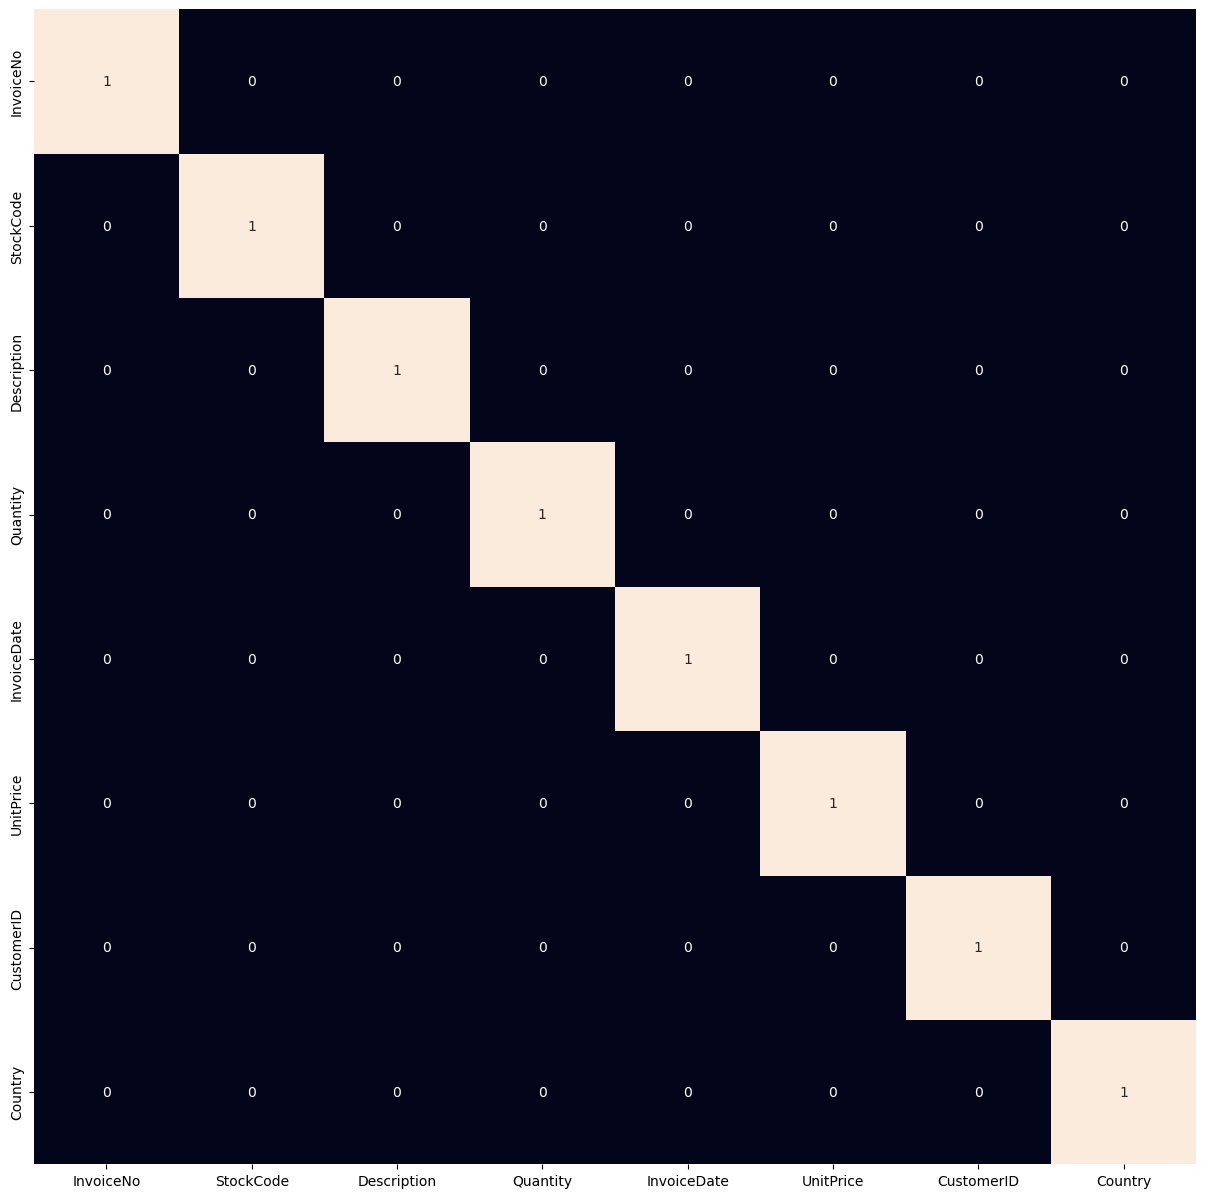

In [14]:
plt.figure(figsize=(15, 15))
sb.heatmap(df.corr() > 0.8, annot=True, cbar=False)
plt.show()


In [ ]:
error = []
for n_clusters in range(1, 21):
	model = KMeans(init='k-means++',
				n_clusters=n_clusters,
				max_iter=500,
				random_state=22)
	model.fit(df)
	error.append(model.inertia_)


In [ ]:
pca = PCA()
pca.fit(matrix)
pca_samples = pca.transform(matrix)